In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [29]:
df = pd.read_csv('sales_data_storytelling.csv')
print(df)


      Month    Product  UnitsSold  Revenue
0   2023-01  Notebooks         50  2346.79
1   2023-01       Pens         55  4987.65
2   2023-01    Markers         25  2290.35
3   2023-01    Folders         94  4394.78
4   2023-01   Staplers        153  4887.80
5   2023-02  Notebooks        113  1268.99
6   2023-02       Pens        198  4193.88
7   2023-02    Markers         98  2907.67
8   2023-02    Folders         45  1759.91
9   2023-02   Staplers         63  1422.85
10  2023-03  Notebooks        173  1956.56
11  2023-03       Pens         38  1397.78
12  2023-03    Markers         39  1590.84
13  2023-03    Folders         66  3682.54
14  2023-03   Staplers        161  1798.84
15  2023-04  Notebooks         56  2777.47
16  2023-04       Pens        119  1942.89
17  2023-04    Markers         22   733.21
18  2023-04    Folders        197  2544.21
19  2023-04   Staplers         24   785.19
20  2023-05  Notebooks        191  1407.79
21  2023-05       Pens        187  4144.44
22  2023-05

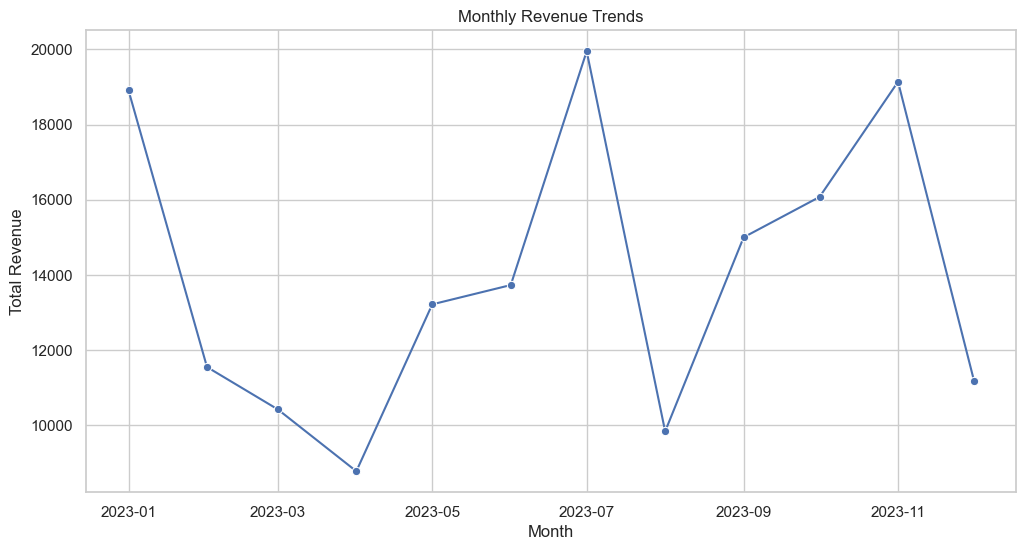

Peak Month: 2023-07 with Revenue: $19947.59
Low-Performing Month: 2023-04 with Revenue: $8782.97


In [30]:
#1. Plot monthly trends in total revenue and identify peak and low-performing months
df['Month'] = pd.to_datetime(df['Month'])
 
 
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()
 

peak_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]
low_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]
 
print(f"Peak Month: {peak_month['Month'].strftime('%Y-%m')} with Revenue: ${peak_month['Revenue']:.2f}")
print(f"Low-Performing Month: {low_month['Month'].strftime('%Y-%m')} with Revenue: ${low_month['Revenue']:.2f}")
 

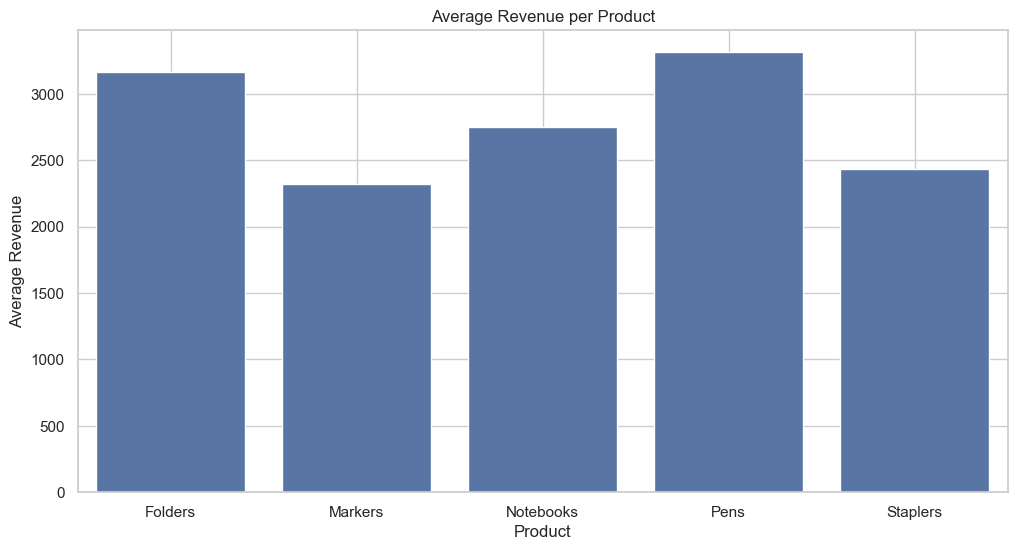

Best-Selling Item: Pens with Average Revenue: $3313.50


In [31]:
#Create a bar chart of average revenue per product and identify the best-selling item



# Calculate average revenue per product
average_revenue_per_product = df.groupby('Product')['Revenue'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=average_revenue_per_product, x='Product', y='Revenue')
plt.title('Average Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

# Identify the best-selling item
best_selling_item = average_revenue_per_product.loc[average_revenue_per_product['Revenue'].idxmax()]
print(f"Best-Selling Item: {best_selling_item['Product']} with Average Revenue: ${best_selling_item['Revenue']:.2f}")

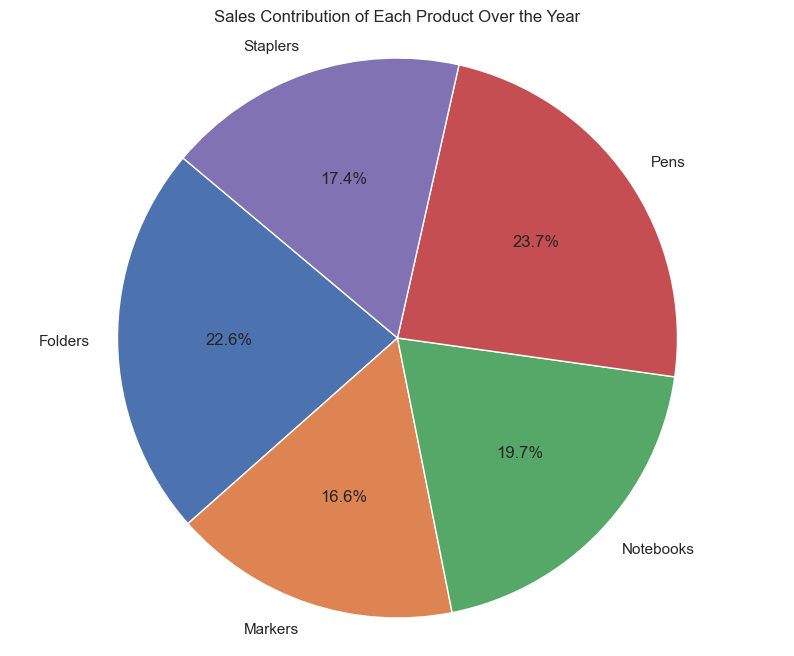

In [32]:
# Calculate total revenue per product
total_revenue_per_product = df.groupby('Product')['Revenue'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_revenue_per_product['Revenue'], labels=total_revenue_per_product['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution of Each Product Over the Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

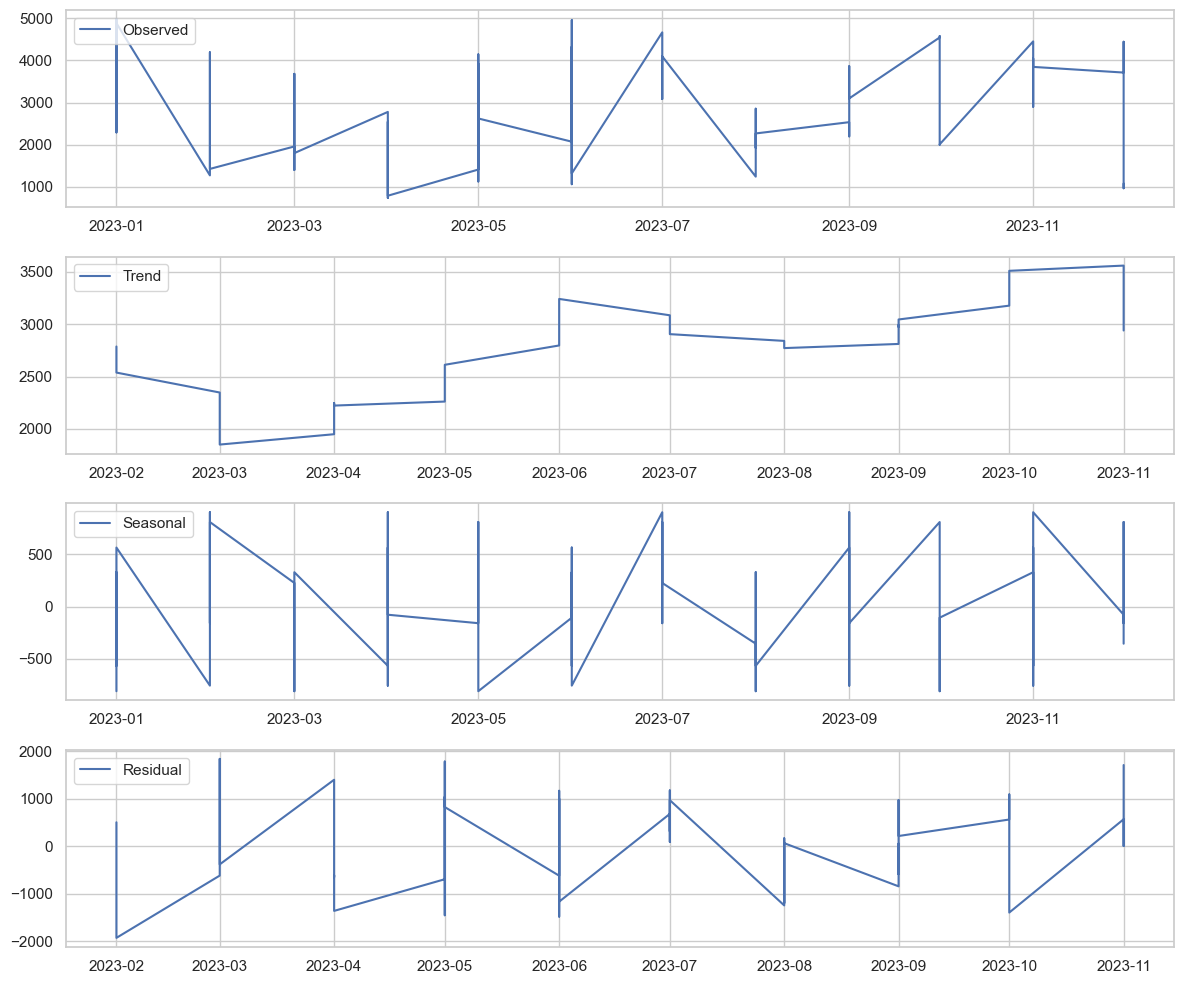

Anomalies detected:
Month
2023-02-01   -1926.285851
Name: resid, dtype: float64


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Detect anomalies by identifying points where the residual component is significantly different from zero
anomalies = decomposition.resid[abs(decomposition.resid) > 2 * decomposition.resid.std()]
print("Anomalies detected:")
print(anomalies)

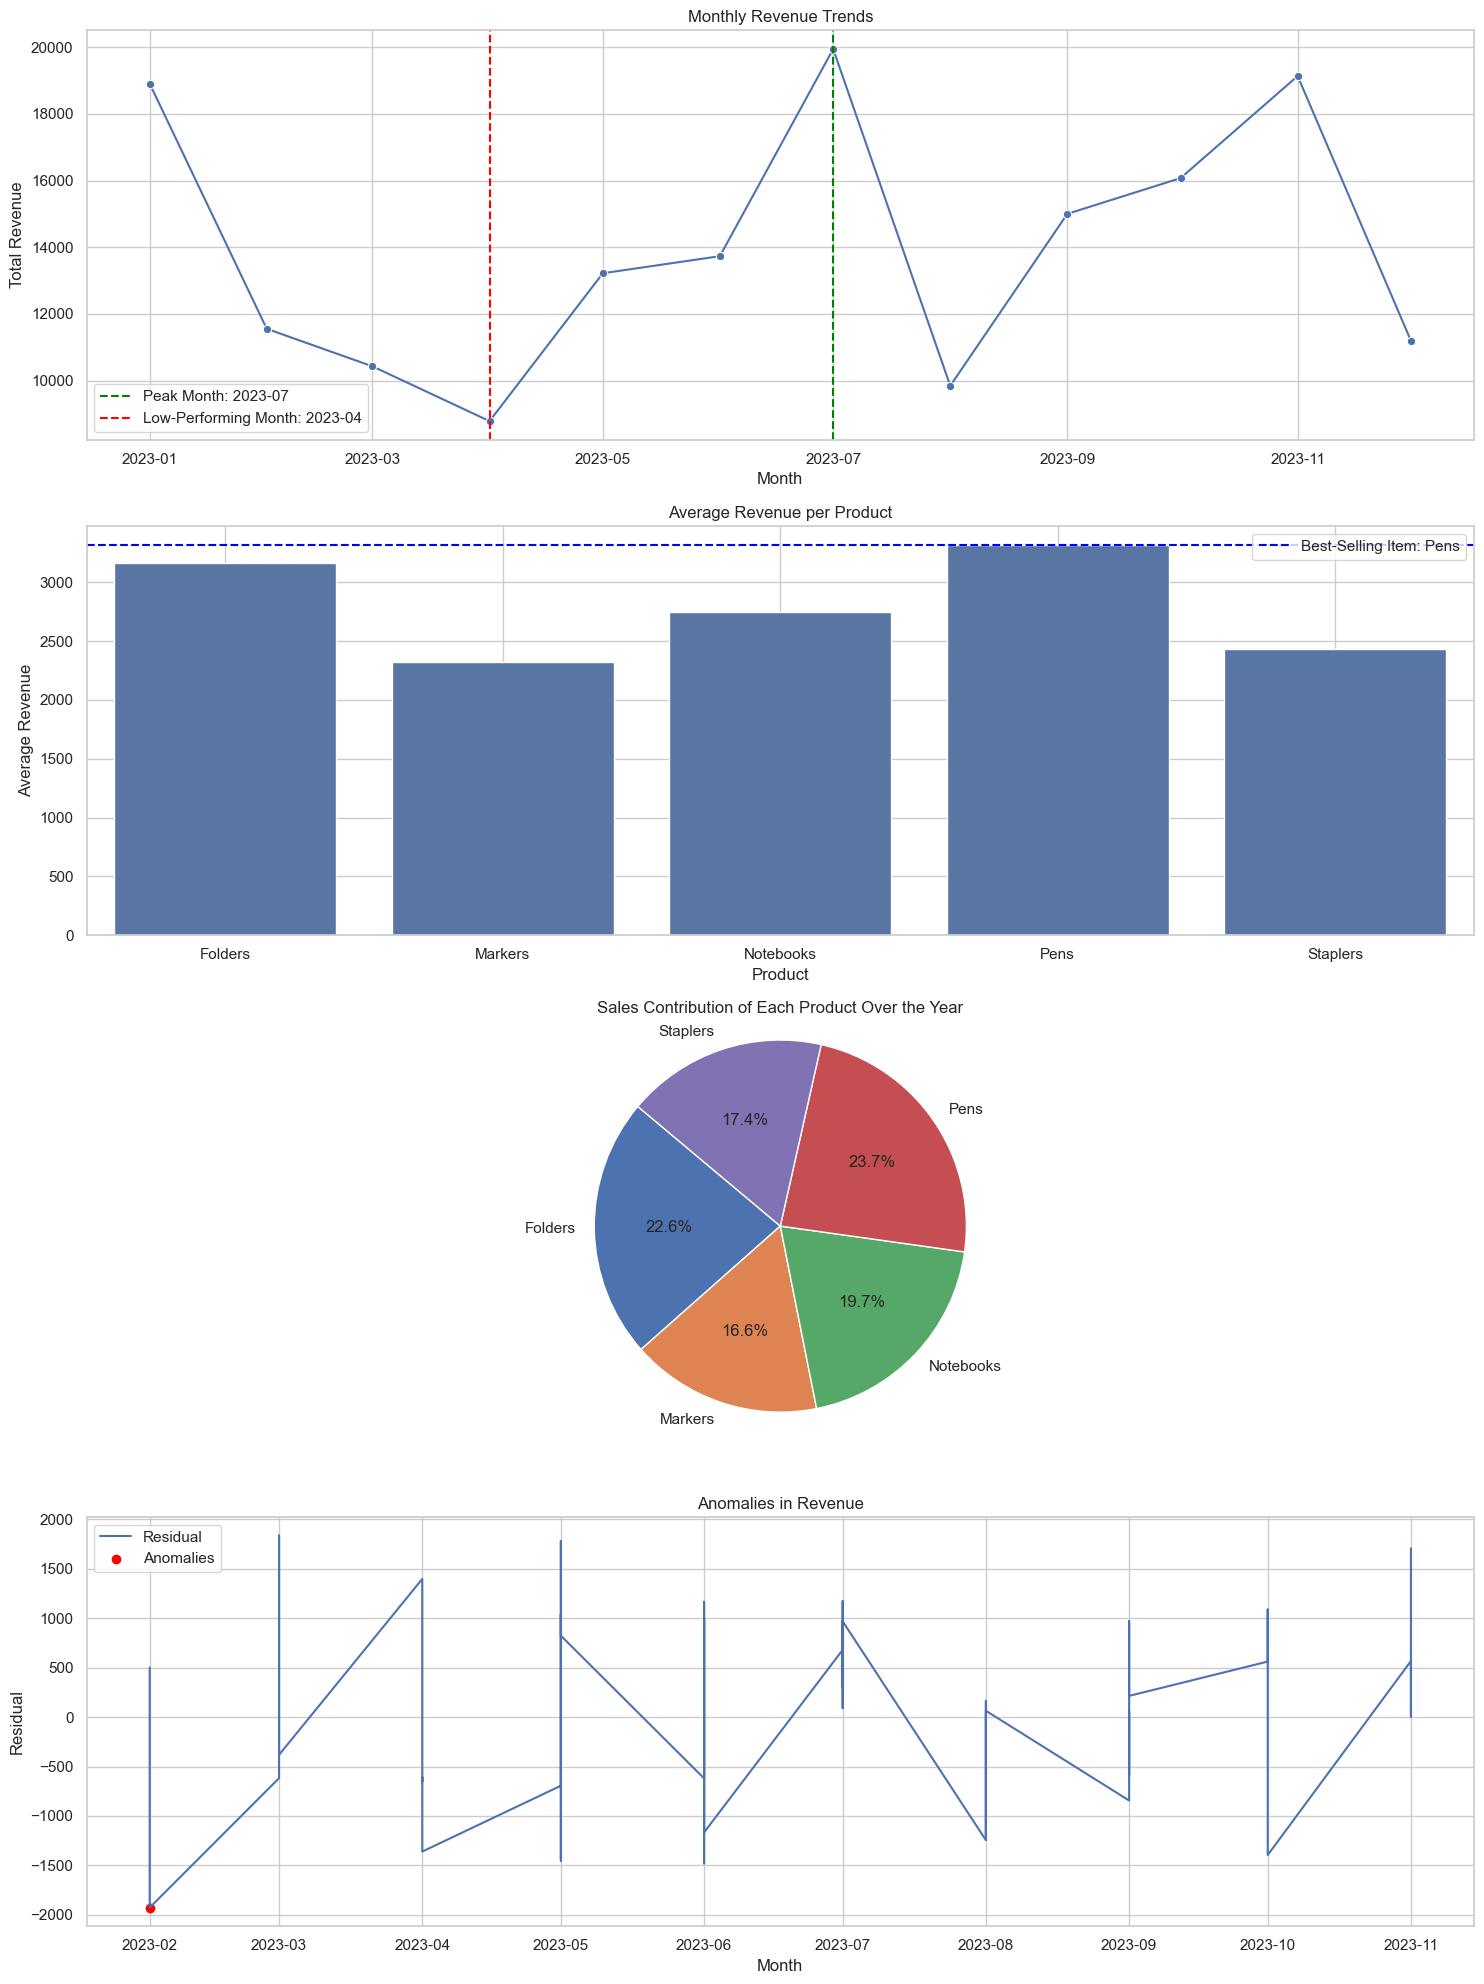

In [34]:
import seaborn as sns

# Import necessary libraries
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure to hold all the subplots
plt.figure(figsize=(15, 20))

# 1. Monthly Revenue Trends
plt.subplot(4, 1, 1)
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Highlight peak and low-performing months
plt.axvline(x=peak_month['Month'], color='green', linestyle='--', label=f"Peak Month: {peak_month['Month'].strftime('%Y-%m')}")
plt.axvline(x=low_month['Month'], color='red', linestyle='--', label=f"Low-Performing Month: {low_month['Month'].strftime('%Y-%m')}")
plt.legend()

# 2. Average Revenue per Product
plt.subplot(4, 1, 2)
sns.barplot(data=average_revenue_per_product, x='Product', y='Revenue')
plt.title('Average Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Average Revenue')
plt.grid(True)

# Highlight the best-selling item
plt.axhline(y=best_selling_item['Revenue'], color='blue', linestyle='--', label=f"Best-Selling Item: {best_selling_item['Product']}")
plt.legend()

# 3. Sales Contribution of Each Product Over the Year
plt.subplot(4, 1, 3)
plt.pie(total_revenue_per_product['Revenue'], labels=total_revenue_per_product['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution of Each Product Over the Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 4. Anomalies in Revenue
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title('Anomalies in Revenue')
plt.xlabel('Month')
plt.ylabel('Residual')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
'''Monthly Revenue Trends: Understanding how revenue changes from month to month is crucial for tracking business growth. The sales data shows fluctuations in revenue, with some 
months performing exceptionally well while others experience lower sales. Identifying these patterns helps the business plan marketing campaigns, 
promotions, and stock levels effectively.
To visualize this trend, a line chart is used to display monthly revenue, making it easy to spot peaks and dips. The month with the highest revenue is 
highlighted in green, indicating a period of strong sales. Conversely, the lowest-performing month is marked in purple, drawing attention to a potential 
issue that requires further investigation. Additionally, a 3-month moving average is added to the chart as a red dashed line, smoothing short-term 
fluctuations and revealing the overall trend. This helps stakeholders recognize whether sales are generally increasing, decreasing, or remaining stable 
over time.'''

'''Best-Selling Product Categories: Not all products contribute equally to the company revenue, some categories consistently generate higher sales than 
others. Identifying the best-performing product categories allows the business to focus its efforts on the most profitable items. By understanding which 
products drive the most revenue, the company can refine its marketing strategies, optimize inventory management, and introduce targeted promotions.To 
present this insight, a bar chart is used to display the average revenue for each product category. The top-performing category is emphasized with a 
dashed green line, making it visually distinct. This chart makes it easy for stakeholders to quickly see which product line is performing the best and
which categories may need improvement. By leveraging this information, the business can make informed decisions about where to allocate resources for 
maximum impact.'''

'''Sales Contribution by Product: Every product category contributes a specific percentage to the company total revenue. Understanding this distribution 
helps in assessing the overall business strategy. If a large portion of sales comes from just one or two categories, it may indicate an over-reliance on 
certain products. On the other hand, a well-balanced sales contribution across multiple categories suggests a more diversified and stable revenue stream.
To illustrate this, a pie chart is used to show the proportion of total sales contributed by each product category. This visual representation helps 
stakeholders quickly grasp how each category impacts overall business performance. By examining these contributions, the company can determine whether it 
needs to expand its product offerings, adjust pricing strategies, or shift its marketing focus.'''

'''Monitor Anomalies or seasonal patterns: Unusual sales spikes or dips should be analysed for root causes, such as unexpected demand shifts, supply 
chain issues, or economic factors. Adapting quickly to these changes will help the business remain agile and competitive.'''